<a href="https://colab.research.google.com/github/mgraves236/neural-networks/blob/main/Sieci_neuronowe_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt ten ma na celu stworzenie architektury sieci neuronowej oraz wytrenowanie jej wraz z doborem hiperparametrów tak, aby osiągnąć możliwie największe wartości wskazanych metryk.

Wykorzystywany dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

26 191 elementów

In [ ]:
# Potrzebne biblioteki

import pathlib
import PIL.Image as Image
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['font.size']=14

from keras.models import Sequential
import time

import tensorflow as tf

# 1. Pobranie danych

In [ ]:
# Usuwanie istniejących folderów

!rm -rf sample_data

# Pobranie danych i wyodrębnienie ich

!wget https://www.dropbox.com/scl/fi/umlj0h521cc9rzeht1qyc/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi&dl=0
!unzip /content/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi

--2023-11-27 21:29:57--  https://www.dropbox.com/scl/fi/umlj0h521cc9rzeht1qyc/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc56eebe32ba49b5edad9f0d6fb.dl.dropboxusercontent.com/cd/0/inline/CIVNOdVzecQW5vL_UgaaJvjGIr9ZirQY5aDAjOQdujaEmxQL2xywghp3LJZuAXNk23QQujdLGdhCvl0FjzvhsmOUb1UYi_ayKQyzapCwUaFgCK8NqxG0HRmoy2Oc742SvCQlrV7ACsGYqRR9AWm3riQG/file# [following]
--2023-11-27 21:29:58--  https://ucc56eebe32ba49b5edad9f0d6fb.dl.dropboxusercontent.com/cd/0/inline/CIVNOdVzecQW5vL_UgaaJvjGIr9ZirQY5aDAjOQdujaEmxQL2xywghp3LJZuAXNk23QQujdLGdhCvl0FjzvhsmOUb1UYi_ayKQyzapCwUaFgCK8NqxG0HRmoy2Oc742SvCQlrV7ACsGYqRR9AWm3riQG/file
Resolving ucc56eebe32ba49b5edad9f0d6fb.dl.dropboxusercontent.com (ucc56eebe32ba49b5edad9f0d6fb.dl.dropboxusercontent.com)... 162.125.1.15, 2620:10

# 2. Przygotowanie danych

# 2.1 Sprawdzenie danych

In [ ]:
# Sprawdzenie ilości obrazów w folderach

ROOT_DIR = "/content/Animals/images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

# plt.bar(srodki_klas, szereg_licznosc[0], width=width)

dict_items([('sheep', 1820), ('cat', 1668), ('cow', 1866), ('spider', 4821), ('chicken', 3098), ('butterfly', 2112), ('squirrel', 1862), ('dog', 4863), ('elephant', 1446), ('horse', 2623)])

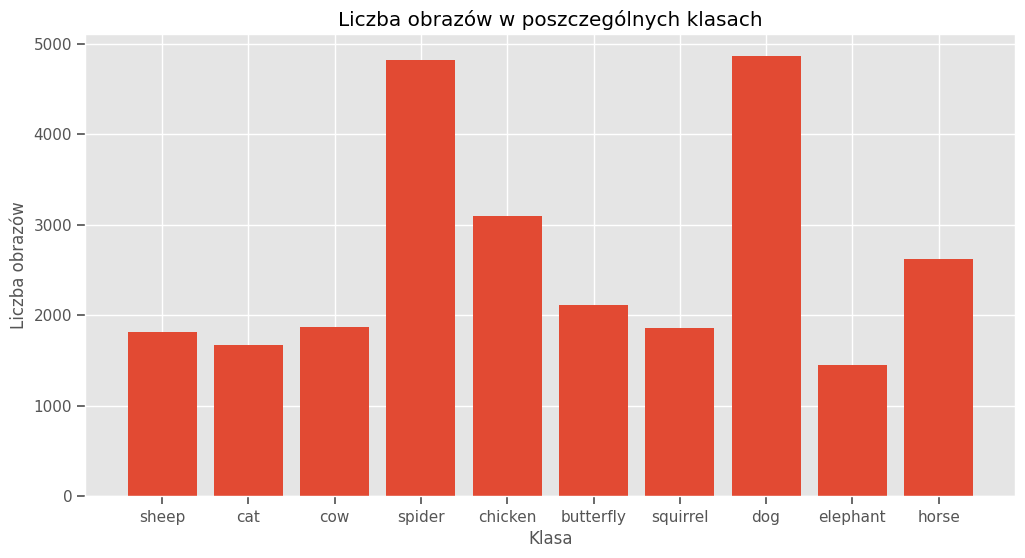

In [ ]:
ROOT_DIR = "/content/Animals/images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Ustaw mniejszy rozmiar wykresu (szerokość x wysokość)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(number_of_images.keys(), number_of_images.values())

ax.set_xlabel('Klasa')
ax.set_ylabel('Liczba obrazów')
ax.set_title('Liczba obrazów w poszczególnych klasach')

plt.style.use('ggplot')
plt.show()

oversampling, undersampling - imb learn
albo ważenie klas

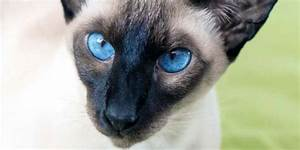

In [ ]:
# Wyświetlenie przykładowego obrazu

data_dir='/content/Animals/images'
path_dir=pathlib.Path(data_dir)
sample_img=list(path_dir.glob('cat/*'))[5]
Image.open(sample_img)

In [ ]:
img = Image.open(sample_img)
print(img.size)

(300, 150)


# 2.1 Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 64
directory = '/content/Animals/images'
num_classes = 10  # Adjust this according to your problem

traingen=ImageDataGenerator(rescale=1/255.,
                           validation_split=.15)

traindata=traingen.flow_from_directory(directory,
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='categorical',
                                      subset='training')


valdata=traingen.flow_from_directory(directory,
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="categorical",subset='validation')

# Apply oversampling to the training data
oversample = RandomOverSampler(sampling_strategy='auto')
X_train, y_train = traindata.next()
X_resampled, y_resampled = oversample.fit_resample(X_train.reshape(-1, img_size * img_size * 3), np.argmax(y_train, axis=1))
X_resampled = X_resampled.reshape(-1, img_size, img_size, 3)
y_resampled_categorical = to_categorical(y_resampled)

# ... (Define your model here)

# Train the model using the oversampled data
model.fit(X_resampled, y_resampled_categorical, epochs=15, validation_data=valdata, callbacks=[checkpoint, earlystopping])



Found 3922 images belonging to 10 classes.
Found 22257 images belonging to 10 classes.
Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 2.1830 - accuracy: 0.2438
Epoch 1: val_loss improved from inf to 2.07251, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 49s 6s/step - loss: 2.1830 - accuracy: 0.2438 - val_loss: 2.0725 - val_accuracy: 0.3075
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 1.6544 - accuracy: 0.5437
Epoch 2: val_loss did not improve from 2.07251
5/5 [==============================] - 18s 4s/step - loss: 1.6544 - accuracy: 0.5437 - val_loss: 2.2573 - val_accuracy: 0.1879
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 1.2013 - accuracy: 0.7000
Epoch 3: val_loss improved from 2.07251 to 1.76394, saving model to model.h5
5/5 [==============================] - 19s 5s/step - loss: 1.2013 - accuracy: 0.7000 - val_loss: 1.7639 - val_accuracy: 0.4113
Epoch 4/15
5/5 [==============================] - ETA: 0s - loss: 0.5290 - accuracy: 0.9000
Epoch 4: val_loss did not improve from 1.76394
5/5 [==============================] - 19s 5s/step - loss: 0.5290 - accuracy: 0.9000 - val_loss: 3.0233 - val_accuracy: 0.2851
Epoch 5/15
5/5 [=============================

KeyboardInterrupt: ignored

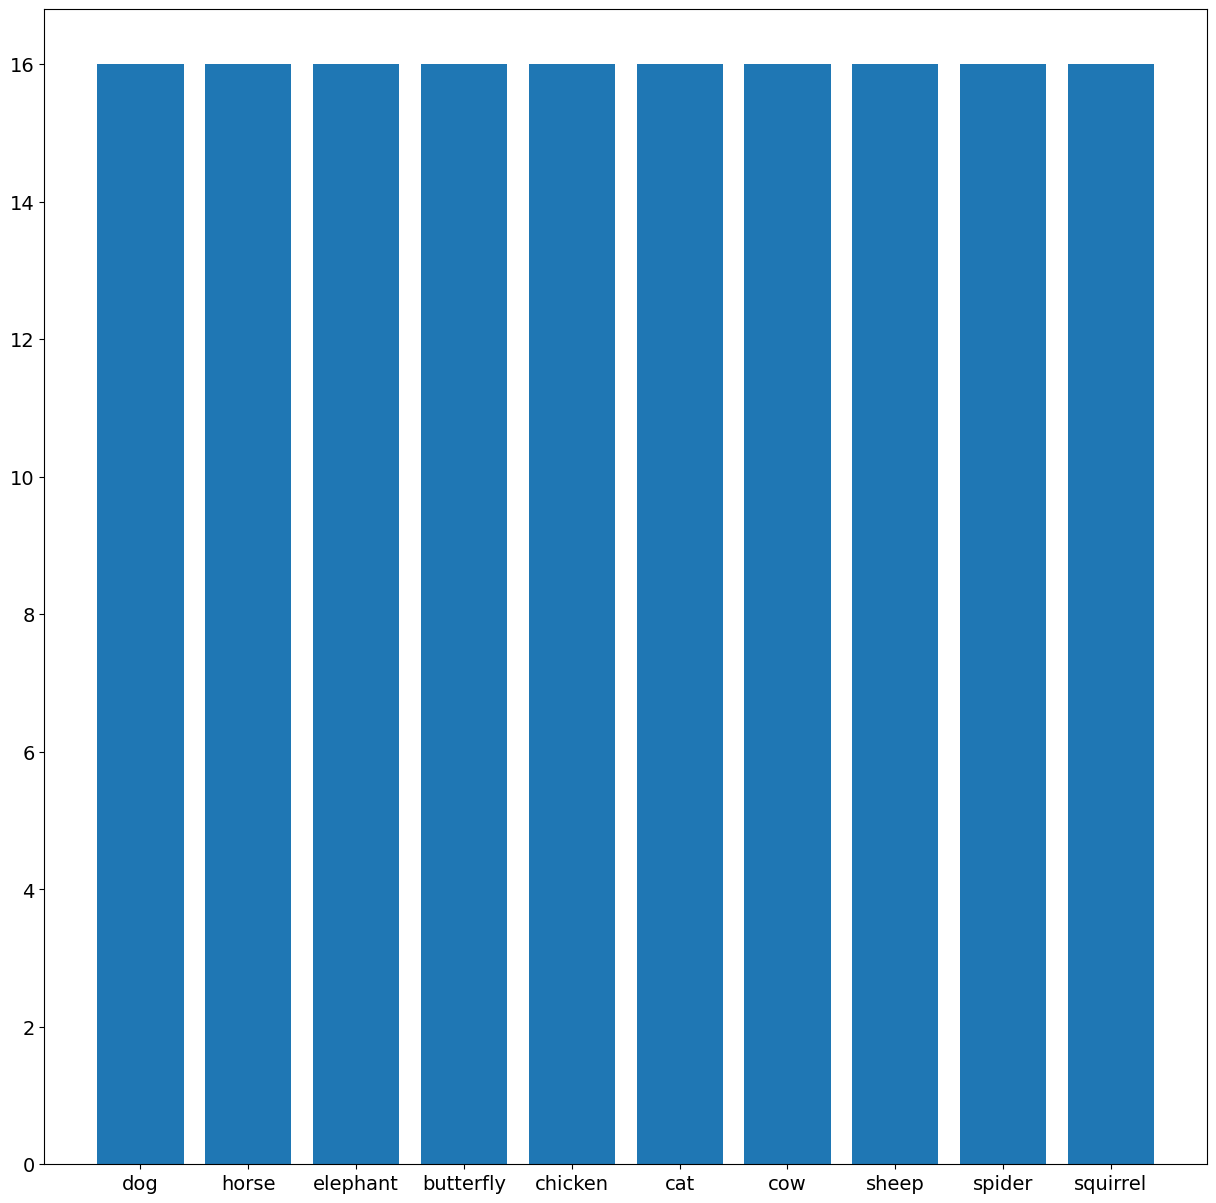

In [ ]:
binarr = []
for i in range(0,10):
    binarr.append(np.count_nonzero(y_resampled==i))

labels = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']
plt.figure(figsize=(15, 15))
plt.bar(labels, binarr)
plt.show()

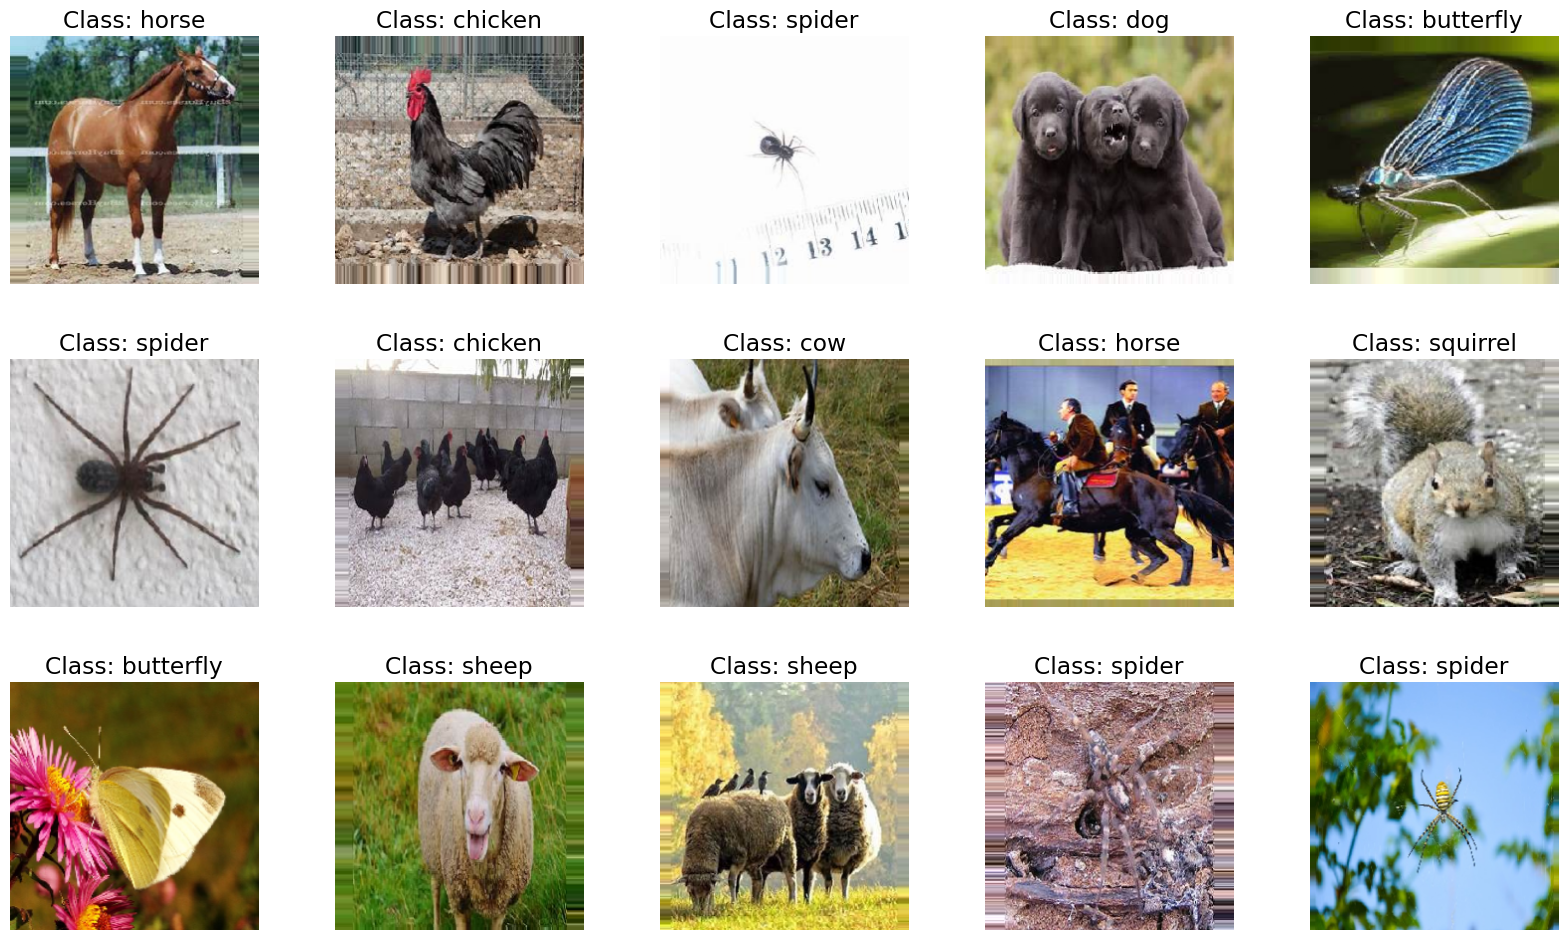

In [ ]:
labels=[key for key in traindata.class_indices]
samples=traindata.__next__()
images=samples[0]
target=samples[1]
plt.rcParams['figure.figsize']=(20,20)

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[np.argmax(target[i],axis=0)]}")
    plt.axis('off')

# 3.1 Wybrany model - VGG16

https://www.kaggle.com/code/atishaygwari/transfer-learning-vgg16-93

porownanie naszej, a tej z transfer learningu

intuicyjne parametry, adaptive learning

In [ ]:
img_size=224
model=tf.keras.applications.vgg16.VGG16(include_top=False,
                                             weights='imagenet',
                                             input_shape=(img_size,img_size,3))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# freezujemy 4 ostatnie warstwy modelu

for layer in model.layers[:-4]:
    layer.trainable=False

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam
last_output = model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(128,activation="relu")(x)
x = Dense(512,activation="relu")(x)
outputs = Dense(10,activation="softmax")(x) # zmieniamy na 10 kategorii bo 10 zwierzatek
model = Model(inputs=model.inputs,outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_name = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [ ]:
history = model.fit(traindata,epochs=15,validation_data=valdata,callbacks=[checkpoint,earlystopping])

Epoch 1/15
696/696 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.7534
Epoch 1: val_loss improved from inf to 0.47069, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


696/696 [==============================] - 489s 681ms/step - loss: 0.7306 - accuracy: 0.7534 - val_loss: 0.4707 - val_accuracy: 0.8427
Epoch 2/15
696/696 [==============================] - ETA: 0s - loss: 0.3558 - accuracy: 0.8855
Epoch 2: val_loss improved from 0.47069 to 0.29060, saving model to model.h5
696/696 [==============================] - 459s 659ms/step - loss: 0.3558 - accuracy: 0.8855 - val_loss: 0.2906 - val_accuracy: 0.9113


KeyboardInterrupt: ignored

In [ ]:
# model = tf.keras.models.load_model("/kaggle/working/model.h5")

# 4.1 Wyniki dla VGG

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test = valdata.classes
y_pred = model.predict(valdata)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names = labels))

# 3.2 Wybrany model - MobileNetV3 / ResNet

też porownanie naszej, a transfer learning

https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
# nie wszystkie potrzebne
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
preprocessed_image = prepare_image('/content/Animals/images/cat/100.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results